# Boosting in ML

## AdaBoost in Machine Learning

AdaBoost is a boosting technique that combines several weak classifiers in sequence to build a strong one. Each new model focuses on correcting the mistakes of the previous one until all data is correctly classified or a set number of iterations is reached.

Think of it like in a class, a teacher focuses more on weak learners to improve its academic performance, similarly boosting work.

![alt text](420046939.webp)

### Process

#### Step 1: Initial Model (B1)
#### Step 2: Adjusting Weights (B2)
#### Step 3: Further Adjustment (B3)
#### Step 4: Final Strong Model (B4 - Ensemble Model)

## Types Of Boosting Algorithms

1. AdaBoost (Adaptive Boosting)
2. Gradient Boosting
3. XGBoost (Extreme Gradient Boosting)
4. LightGBM (Light Gradient Boosting Machine)
5. CatBoost (Categorical Boosting)

8 **Gradient Boosting:** Gradient Boosting constructs models in a sequential manner where each weak learner minimizes the residual error of the previous one using gradient descent. Instead of adjusting sample weights like AdaBoost Gradient Boosting reduces error directly by optimizing a loss function.
* **XGBoost:** XGBoost is an optimized version of Gradient Boosting that uses regularization to prevent overfitting. It is faster, efficient and supports handling both numerical and categorical variables.
* **CatBoost:** CatBoost is particularly effective for datasets with categorical features. It employs symmetric decision trees and a unique encoding method that considers target values, making it superior in handling categorical data without preprocessing.

## Advantages of Boosting 

1. Improved Accuracy
2. Versatility
3. Reduced Overfitting
4. Feature Importance
5. Flexibility

# Implementing the AdaBoost Algorithm From Scratch


### Importing Libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

### 2. Defining the AdaBoost Class

In this step we define a custom class called AdaBoost that will implement the AdaBoost algorithm from scratch. This class will handle the entire training process and predictions.

The AdaBoost class is where we define the entire AdaBoost algorithm which consists of:

* Initializing model parameters like number of estimators, weights and models.
* Fitting the model to the training data.
* Making predictions using the trained model.

In [3]:
class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, n_featuers = X.shape
        w = np.ones(n_samples)/n_samples

        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=w)
            predictions = model.predict(X)

            err = np.sum(w*(predictions !=y)) / np.sum(w)

            alpha = 0.5 * np.log((1-err)/ (err +1e-10))

            self.models.append(model)
            self.alphas.append(alpha)

            w *= np.exp(-alpha * y * predictions)
            w /= np.sum(w)

    def predict(self, X):
        strong_preds = np.zeros(X.shape[0])

        for model, alpha in zip(self.models, self.alphas):
            predictions = model.predict(X)
            strong_preds += alpha * predictions
        
        return np.sign(strong_preds).astype(int)

### 3. Training the AdaBoost Model

In the fit() method we:

* Sample Weights Initialization: w= np.ones(n_samples) / n_samples initializes all sample weights equally.
* Training the Weak Classifier: A DecisionTreeClassifier with max_depth =1 is trained using the current sample weights.
* Error Calculation: err = np.sum (w* ( predictions != y)) / np.sum(w) computes the weighted error of the classifier.
* Alpha Calculation: alpha = 0.5*np.log ((1-err) / (err+1e-10) ) calculates the classifier's weight (alpha).
* Updating Weights: Misclassified samples weights are increased using w *= np.exp(-alpha *y *predictions) and normalized with w /= np.sum(w).

### 4. Defining Predict Method

In the predict() method we combine the predictions of all weak classifiers using their respective alpha values to make the final prediction.

* strong_preds = np.zeroes(X.shape[0]) initializes an array of zeros to store the weighted sum of predictions from all weak classifiers.
* for model, alpha in zip(self.models, self.alphas) loops through each trained model and its corresponding alpha value.
* strong_preds += alpha * predictions adds the weighted prediction of each weak model to strong_preds
* np.sign(strong_preds) takes the sign of the sum to classify samples as 1 (positive class) or -1 (negative class).

### 5. Example Usage

* We are generating a synthetic dataset with 1000 samples and 20 features.
* Then, we split the data into training and testing sets.
* We initialize and train an AdaBoost classifier with 50 estimators.
* After training, we predict on the test set and evaluate the model.

In [9]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

if __name__ == "__main__":

    X, y = make_classification(
        n_samples=1000,
        n_features=20,
        n_classes=2,
        random_state=42
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    adaboost = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        random_state=42
    )

    adaboost.fit(X_train, y_train)

    predictions = adaboost.predict(X_test)
    probabilities = adaboost.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")

C:\Users\PANDIT JI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 85.67%
Precision: 0.8835616438356164
Recall: 0.832258064516129
F1 Score: 0.8571428571428571
ROC-AUC: 0.9098998887652948


In [10]:
# if __name__ == "__main__":

#     X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     adaboost = AdaBoost(n_estimators=50)
#     adaboost.fit(X_train, y_train)

#     predictions = adaboost.predict(X_test)

#     accuracy = accuracy_score(y_test, predictions)
#     precision = precision_score(y_test, predictions)
#     recall = recall_score(y_test, predictions)
#     f1 = f1_score(y_test, predictions)
#     try:
#         roc_auc = roc_auc_score(y_test, predictions)
#     except ValueError:
#         roc_auc = 'Undefined (requires probability scores)'

#     print(f"Accuracy: {accuracy * 100}%")
#     print(f"Precision: {precision}")
#     print(f"Recall: {recall}")
#     print(f"F1 Score: {f1}")
#     print(f"ROC-AUC: {roc_auc}")

                                                                        Gradient Boosting in ML                                              

# Gradient Boosting in ML

Gradient Boosting is a boosting algorithm and here each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration the algorithm computes the gradient of the loss function with respect to predictions and then trains a new weak model to predict this gradient. Predictions of the new model are then added to the ensemble (all models prediction) and the process is repeated until a stopping criterion is met.

## Shrinkage and Model Complexity

A key feature of Gradient Boosting is shrinkage which scales the contribution of each new model using learning rate (denoted as 
η).

* **Smaller learning rates:** mean the contribution of each tree is smaller which reduces the risk of overfitting but requires more trees to achieve the same performance.
* **Larger learning rates:** mean each tree has a more significant impact but this can lead to overfitting.

There's a trade off between the learning rate and the number of estimators (trees) a smaller learning rate usually means more trees are required to achieve optimal performance.

## Working of Gradient Boosting

1. Sequential Learning Process

2. Residuals Calculation

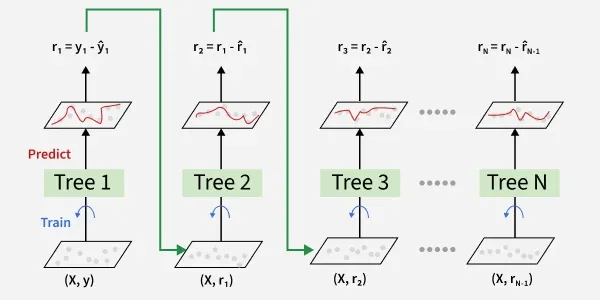

3. Shrinkage



## Implementing Gradient Boosting for Classification and Regression

* **n_estimators:** This specifies the number of trees (estimators) to be built. A higher value typically improves model performance but increases computation time.
* **learning_rate:** This is the shrinkage parameter. It scales the contribution of each tree.
* **random_state:** It ensures reproducibility of results. Setting a fixed value for random_state ensure that you get the same results every time you run the model.
* **max_features:** This parameter limits the number of features each tree can use for splitting. It helps prevent overfitting by limiting the complexity of each tree and promoting diversity in the model.

# Classification

We use Gradient Boosting Classifier to predict digits from Digits dataset.

* Import the necessary libraries
* Setting SEED for reproducibility
* Load the digit dataset and split it into train and test.
* Instantiate Gradient Boosting classifier and fit the model.
* Predict the test set and compute the accuracy score.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

SEED = 23

X, y = load_digits(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 
gbc.fit(train_X, train_y)

pred_y = gbc.predict(test_X)

acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.98


# Regression

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

SEED = 23

X, y = load_diabetes(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1, 
                                random_state = SEED,
                                max_features = 5)

gbr.fit(train_X, train_y)

pred_y = gbr.predict(test_X)

test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 56.39


## How to Tune Hyperparameters in Gradient Boosting Algorithm


## Gradient Boosting Hyperparameters

* **n_estimators:** Number of boosting stages to be run. More estimators can improve performance but may lead to overfitting.
* **learning_rate:** Controls the contribution of each tree. Lower values require more trees but can improve generalization.
* **max_depth:** Maximum depth of each tree. Deeper trees can capture more complex patterns but may overfit.
* **min_samples_split:** Minimum number of samples required to split an internal node. Higher values prevent overfitting.
* **min_samples_leaf:** Minimum number of samples required to be at a leaf node. Higher values can smooth the model.
* **subsample:** Fraction of samples used for fitting each base learner. Values less than 1.0 introduce randomness and can help prevent overfitting.
* **sampling:** Fraction of samples used for fitting each base learner. Values less than 1.0 introduce randomness and can help prevent overfitting.

## Gradient Boosting Hyperparameter Tuning in Python

### Classification Model without Tuning

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

titanic_data = pd.read_csv("https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv")

titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7988826815642458


## 1. Hyperparameter Tuning using GridSeachCV

GridSearchCV systematically tests all possible combinations of hyperparameters from a predefined grid to identify the best configuration for a model. It is most effective when the number of combinations is relatively small. With GradientBoostingClassifier(), we can pass the model into GridSearchCV and fit it on the training data to obtain the optimal parameters.

* **param_grid:** A dictionary containing hyperparameters and their possible values. GridSearchCV will try every combination of these values to find the best-performing set of hyperparameters.
* **grid_search.fit(X_train, y_train):** This line trains the Gradient Boosting model using all combinations of the hyperparameters defined in param_grid.
* **grid_search.best_estimator_:** After completing the grid search this will return the Gradient Boosting model that has the best combination of hyperparameters from the search.
* **best_params:** This stores the best combination of hyperparameters found during the grid search.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

titanic_data = pd.read_csv("https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv")

titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Model Accuracy: 0.8044692737430168


## 2. Hyperparameter Tuning using RandomizedSearchCV

RandomizedSearchCV is used to tune hyperparameters by sampling random combinations from a predefined grid. Unlike GridSearchCV, it does not search all possibilities, making it faster and more practical when the parameter space is large. With GradientBoostingClassifier(), we can pass the model to RandomizedSearchCV and fit it on the training data to identify a strong set of parameters without evaluating every option.

* **param_dist:** it will randomly sample from this distribution to find the best-performing combination of hyperparameters.
* **random_search.fit(X_train, y_train):** This line trains the GradientBoostingClassifier model using random combinations of hyperparameters defined in param_dist.
* **random_search.best_estimator_:** This retrieves the model that has the best combination of hyperparameters found during the random search.
* **best_params:** This stores the best combination of hyperparameters found during the search.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

titanic_data = pd.read_csv("https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv")

titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'learning_rate': np.arange(0.01, 0.2, 0.01), 
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [3, 5, 7, 9],  
}

gb_model = GradientBoostingClassifier()

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.060000000000000005}
Best Model Accuracy: 0.8044692737430168


## 3. Hyperparameter Tuning using Optuna

Optuna is an efficient framework for hyperparameter tuning that searches for settings to improve model performance. The process begins with defining an objective function, which Optuna then attempts to minimize or maximize through iterative trials. Its flexibility allows it to work well across different models and tasks, including Gradient Boosting, where it can be used to identify the most effective hyperparameters.

* **param_space:** Defines the hyperparameter search space where Optuna samples values for n_estimators, learning_rate and max_depth within the specified ranges.
* **objective(trial):** The objective function that it tries to minimize. It trains the GradientBoostingClassifier with different hyperparameters, calculates the accuracy and returns the inverse of accuracy.
* **study.optimize(objective, n_trials=50):** This runs the optimization process for 50 trials exploring the hyperparameter space and finding the best-performing combination of parameters.
* **study.best_params:** Returns the best combination of hyperparameters found during the optimization process.
* **best_model_optuna.fit(X_train, y_train):** Fits the GradientBoostingClassifier model using the best hyperparameters found by it.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import optuna

titanic_data = pd.read_csv("https://raw.githubusercontent.com/itsluckysharma01/Datasets/refs/heads/main/GFG_titanic.csv")

titanic_data.fillna(0, inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    param_space = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 250, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
    }

    gb_model = GradientBoostingClassifier(**param_space, validation_fraction=0.1, n_iter_no_change=5, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return 1.0 - accuracy 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params_optuna = study.best_params
best_model_optuna = GradientBoostingClassifier(**best_params_optuna, validation_fraction=0.1, n_iter_no_change=5, random_state=42)
best_model_optuna.fit(X_train, y_train)

y_pred_best_optuna = best_model_optuna.predict(X_test)

accuracy_best_optuna = accuracy_score(y_test, y_pred_best_optuna)
print(f"Best Model Accuracy (Optuna): {accuracy_best_optuna}")

[I 2026-01-22 01:04:25,913] A new study created in memory with name: no-name-23c166b6-fed6-4413-8b0c-f90599a1a23f
[I 2026-01-22 01:04:26,143] Trial 0 finished with value: 0.2011173184357542 and parameters: {'n_estimators': 100, 'learning_rate': 0.09765176719131269, 'max_depth': 7}. Best is trial 0 with value: 0.2011173184357542.
[I 2026-01-22 01:04:26,281] Trial 1 finished with value: 0.2122905027932961 and parameters: {'n_estimators': 200, 'learning_rate': 0.15355744196069473, 'max_depth': 7}. Best is trial 0 with value: 0.2011173184357542.
[I 2026-01-22 01:04:26,373] Trial 2 finished with value: 0.2067039106145251 and parameters: {'n_estimators': 50, 'learning_rate': 0.02165908832971747, 'max_depth': 3}. Best is trial 0 with value: 0.2011173184357542.
[I 2026-01-22 01:04:26,451] Trial 3 finished with value: 0.1843575418994413 and parameters: {'n_estimators': 100, 'learning_rate': 0.16454919505965646, 'max_depth': 5}. Best is trial 3 with value: 0.1843575418994413.
[I 2026-01-22 01:04

Best Model Accuracy (Optuna): 0.8212290502793296
